## Task5 文本表示

1.one-hot编码

中文名叫独热编码、一位有效编码。方法是使用N位状态寄存器来对N个状态进行编码，每个状态都有其独立的寄存器位，并且任意时刻，有且仅有一个状态位是有效的。比如，手写数字识别，数字为0-9共10个，那么每个数字的one-hot编码为10位，数字i的第i位为1，其余为0，如数字2的one-hot表示为：[0,0,1,0,0,0,0,0,0,0]。

1.2one-hot在提取文本特征上的应用

one-hot在特征提取上属于词袋模型(bags of words)

假设语料库有这么三段话：

我爱中国

爸爸妈妈爱我

爸爸妈妈爱中国

对语料库分词并进行编号

1我；2爱；3爸爸；4妈妈；5中国

对每段话用onehot提取特征向量

则三段话由onehot表示为：

我爱中国              -> 1,1,0,0,1

爸爸妈妈爱我       ->1,1,1,1,0

爸爸妈妈爱中国   ->0,1,1,1,1

优点：可以将数据用onehot进行离散化，在一定程度上起到了扩充特征的作用

缺点：没有考虑词与词之间的顺序，并且假设词与词之间相互独立，得到的特征是离散稀疏的（如果365天用onehot，就是365维，会很稀疏）

在实际的机器学习的应用任务中，特征有时候并不总是连续值，有可能是一些分类值，如性别可分为“male”和“female”。在机器学习任务中，对于这样的特征，通常我们需要对其进行特征数字化，如下面的例子：
有如下三个特征属性：
性别：["male"，"female"]   # 所有可能取值，0,1  两种情况  
地区：["Europe"，"US"，"Asia"]    #0,1,2 三种情况
浏览器：["Firefox"，"Chrome"，"Safari"，"Internet Explorer"]  #0,1，2,3四种情况
所以样本的第一维只能是0或者1，第二维是0,1,2三种情况中的一种，第三维，是0,1,2,3四种情况中的一种。
对于某一个样本，如["male"，"US"，"Internet Explorer"]，我们需要将这个分类值的特征数字化，最直接的方法，我们可以采用序列化的方式：[0,1,3]。但是这样的特征处理并不能直接放入机器学习算法中。
对上述问题，我们发现性别2维，地区3维，浏览器4维则我们进行onehot编码需要9维。对["male"，"US"，"Internet Explorer"]进行onehot编码为：[1,0,0,1,0,0,0,0,1]

先打卡 后补

词袋模型

分布式表示

word2vec词向量

word2vec作为神经概率语言模型的输入，其本身其实是神经概率模型的副产品，是为了通过神经网络学习某个语言模型而产生的中间结果。具体来说，“某个语言模型”指的是“CBOW”和“Skip-gram”。具体学习过程会用到两个降低复杂度的近似方法——Hierarchical Softmax或Negative Sampling。两个模型乘以两种方法，一共有四种实现。这些内容就是本文理论部分要详细阐明的全部了。

Hierarchical Softmax

模型共同点

无论是哪种模型，其基本网络结构都是在下图的基础上，省略掉hidden layer：
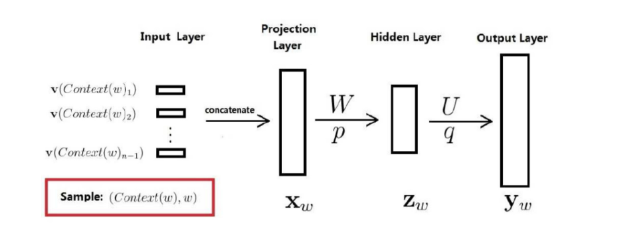

CBOW原理

CBOW 是 Continuous Bag-of-Words Model 的缩写，是一种根据上下文的词语预测当前词语的出现概率的模型。其图示如上图左。

CBOW是已知上下文，估算当前词语的语言模型。其学习目标是最大化对数似然函数：
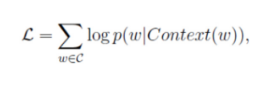
其中，w表示语料库C中任意一个词。从上图可以看出，对于CBOW，

输入层是上下文的词语的词向量（什么！我们不是在训练词向量吗？不不不，我们是在训练CBOW模型，词向量只是个副产品，确切来说，是CBOW模型的一个参数。训练开始的时候，词向量是个随机值，随着训练的进行不断被更新）。

投影层对其求和，所谓求和，就是简单的向量加法。

输出层输出最可能的w。由于语料库中词汇量是固定的|C|个，所以上述过程其实可以看做一个多分类问题。给定特征，从|C|个分类中挑一个。

Skip-gram原理

Skip-gram只是逆转了CBOW的因果关系而已，即已知当前词语，预测上下文

与CBOW的两个不同在于

输入层不再是多个词向量，而是一个词向量

投影层其实什么事情都没干，直接将输入层的词向量传递给输出层